In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Build random data

In [98]:
X, y = make_classification(n_samples=80000, n_features=20)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train, y_train, test_size=0.5)

# Build network

In [100]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [101]:
def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [102]:
keras_model = build_model()

In [103]:
keras_model.fit(X_train, y_train, epochs=5, batch_size=100, verbose=1)

Epoch 1/5
20000/20000 [==============================] - 1s 50us/step - loss: 0.4452 - acc: 0.7959
Epoch 2/5
20000/20000 [==============================] - 1s 25us/step - loss: 0.3108 - acc: 0.8691
Epoch 3/5
20000/20000 [==============================] - 0s 22us/step - loss: 0.2974 - acc: 0.8731
Epoch 4/5
20000/20000 [==============================] - 1s 26us/step - loss: 0.2910 - acc: 0.8760
Epoch 5/5
20000/20000 [==============================] - 0s 22us/step - loss: 0.2866 - acc: 0.8768


In [112]:
prediction_keras = keras_model.predict(X_test)
prediction_keras[0:5]

array([[5.5619277e-04],
       [9.3935770e-01],
       [2.4827126e-01],
       [1.2715414e-01],
       [4.8787859e-01]], dtype=float32)

In [113]:
prediction_keras = prediction_keras.ravel()
prediction_keras[0:5]

array([5.5619277e-04, 9.3935770e-01, 2.4827126e-01, 1.2715414e-01,
       4.8787859e-01], dtype=float32)

In [141]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, prediction_keras)
roc_auc_keras = auc(fpr_keras, tpr_keras)
print("ROC AUC score: %.2f%%" % roc_auc_keras)

ROC AUC score: 0.95%


In [142]:
print("ROC AUC score: %.2f%%" % (roc_auc_score(y_test, prediction_keras)))

ROC AUC score: 0.95%


# Plot the ROC

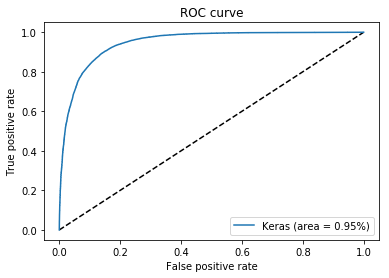

In [143]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.2f}%)'.format(roc_auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.2f%})'.format(auc_rf)) # plot more than one classifier result
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

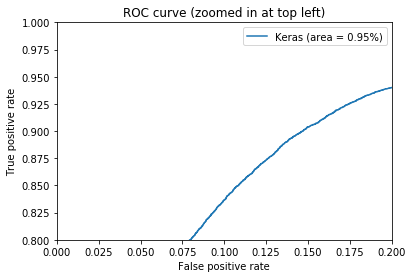

In [145]:
# Zoom in view of the upper left corner
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.2f}%)'.format(roc_auc_keras))
# plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.2f%})'.format(auc_rf)) # plot more than one classifier result
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

<hr/>